# Decompose

In [90]:
import pandas as pd

dataset = pd.read_csv('smart_meters_london_2013.csv')
df = dataset.T

In [93]:
from matplotlib import pyplot as plt
import numpy as np

In [91]:
df.columns = pd.to_datetime(df.iloc[0])
df = df[1:]

Text(0.5, 1.0, 'Typical day')

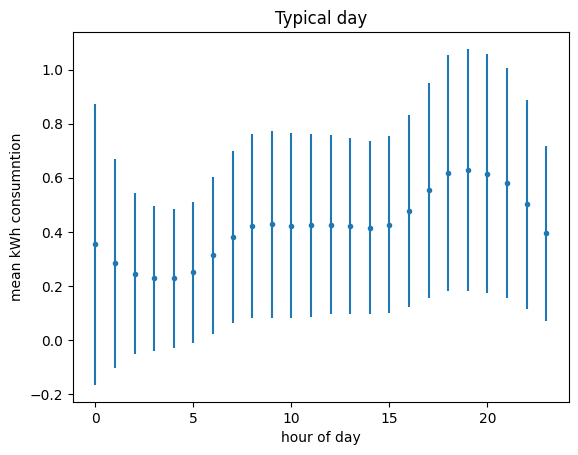

In [109]:
hour = pd.to_datetime(df.columns).hour
hours = set(hour)
hourly = np.zeros((2, len(hours)))
for i, h in enumerate(hours):
    tmp = df.iloc[:,hour == h].mean(axis=1)
    hourly[0,i] = tmp.mean()
    hourly[1,i] = tmp.std()

# plt.plot(hourly[0])
plt.errorbar(list(range(len(hours))), hourly[0], hourly[1], linestyle='None', marker='.')
plt.xlabel("hour of day")
plt.ylabel("mean kWh consumntion")
plt.title("Typical day")

In [ ]:
day = pd.to_datetime(df.columns).dayofweek
days = set(day)
daily = np.zeros((2, len(days)))
for i, d in enumerate(days):
    tmp = df.iloc[:,day == d].mean(axis=1)
    daily[0,i] = tmp.mean()
    daily[1,i] = tmp.std()

# plt.plot(daily[0])
plt.errorbar(list(range(len(days))), daily[0], daily[1], linestyle='None', marker='.')
plt.xlabel("day of week")
plt.ylabel("mean kWh consumntion")
plt.title("Typical week")

Text(0.5, 1.0, 'Typical year')

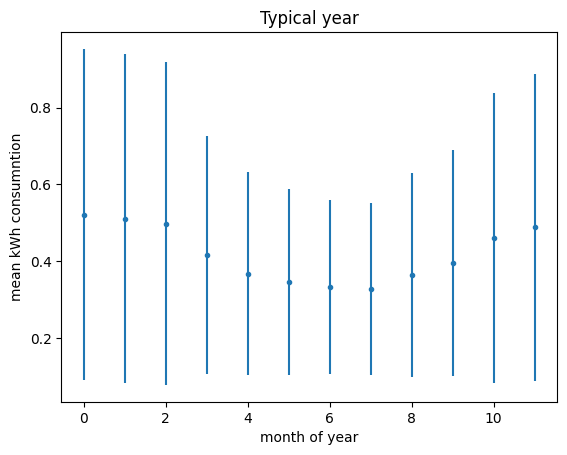

In [112]:
month = pd.to_datetime(df.columns).month
months = set(month)
monthly = np.zeros((2, len(months)))
for i, m in enumerate(months):
    tmp = df.iloc[:,month == m].mean(axis=1)
    monthly[0,i] = tmp.mean()
    monthly[1,i] = tmp.std()

# plt.plot(monthly[0])
plt.errorbar(list(range(len(months))), monthly[0], monthly[1], linestyle='None', marker='.')
plt.xlabel("month of year")
plt.ylabel("mean kWh consumntion")
plt.title("Typical year")

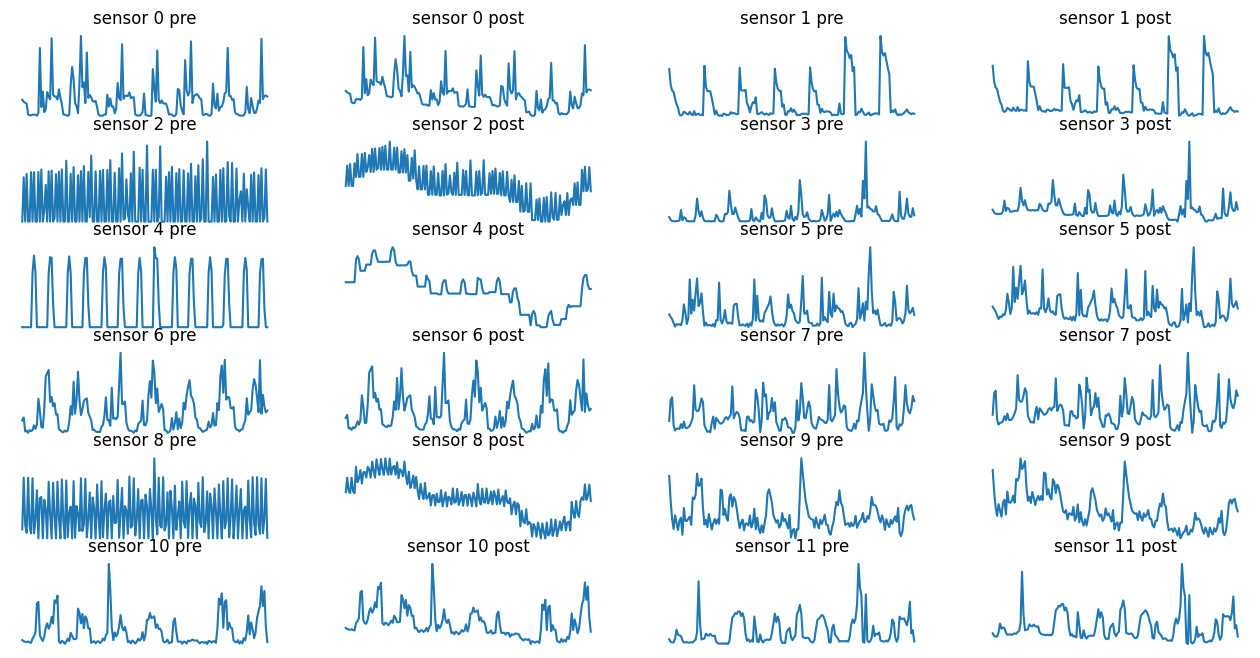

In [159]:
fig, ax = plt.subplots(nrows=6, ncols=4, sharex=True, figsize=(16,8))
for i in range(12):
    plt.subplot(6, 4, 2*i+1)
    plt.plot(df.iloc[i,:168].to_numpy())
    plt.axis('off')
    plt.title(f"sensor {i} pre")
    plt.subplot(6, 4, 2*i+2)
    plt.plot(df.iloc[i,:168].to_numpy() - np.repeat(hourly[0], 7))
    plt.axis('off')
    plt.title(f"sensor {i} post")